# Statistical evaluation for error for probabilistic quadratures

In this script we want to  evaluate statistical data. For this we load data, which was calculated and saved in a .cvs/ .pkt file, because generating file takes some hours. 

In [1]:
import matplotlib.pyplot as plt

import os
os.chdir("..")
from Methodes.Smolyak_one import *

## First approximation of distribution

### One point for q = 1

First we want to give a feeling for the distribution of the results of the Smolyak algorithm using different quadratures and the effect of higher degrees of approximation. 

We only show the first degrees of approximation, because otherwise nothing could be seen, due to the scaling of the plot.

In [2]:
try: 
    os.chdir("Data")
except:
    pass
results_one = load_stat_data("stat_approach_2_to_20_result_6_1_one.csv")
results_three = load_stat_data("stat_approach_2_to_20_result_6_1_three.csv")

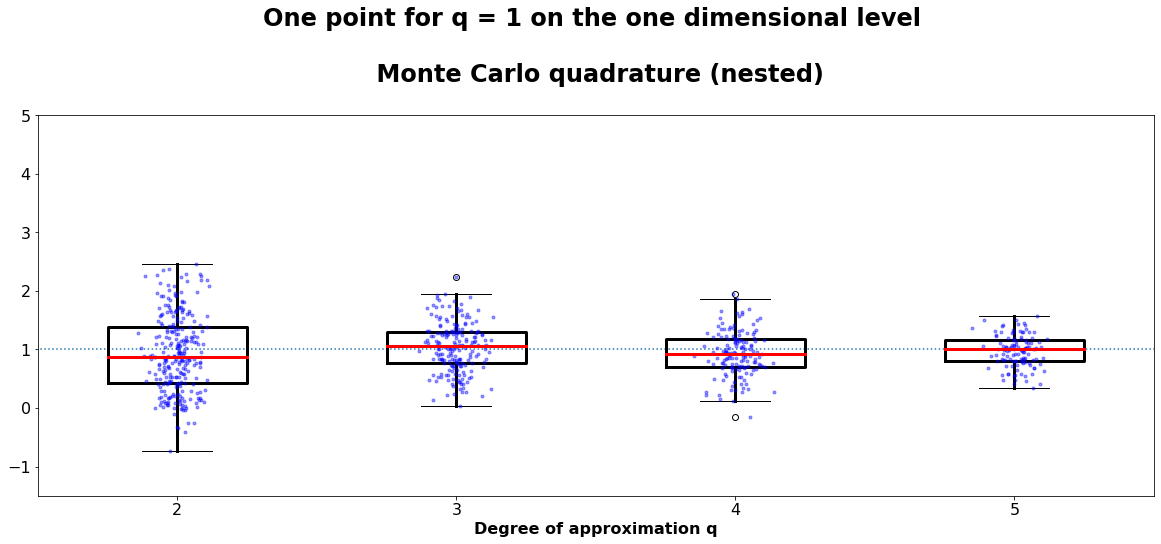

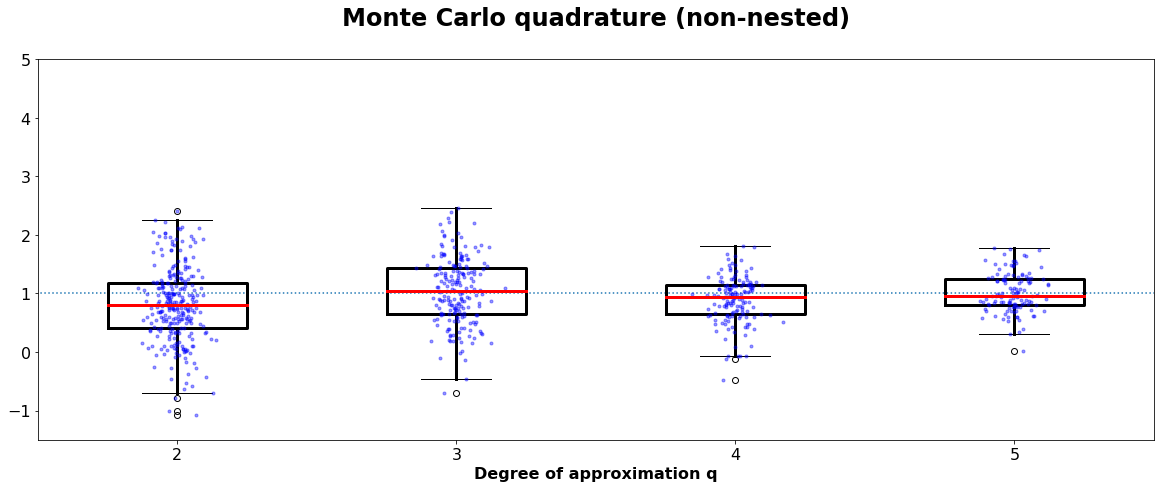

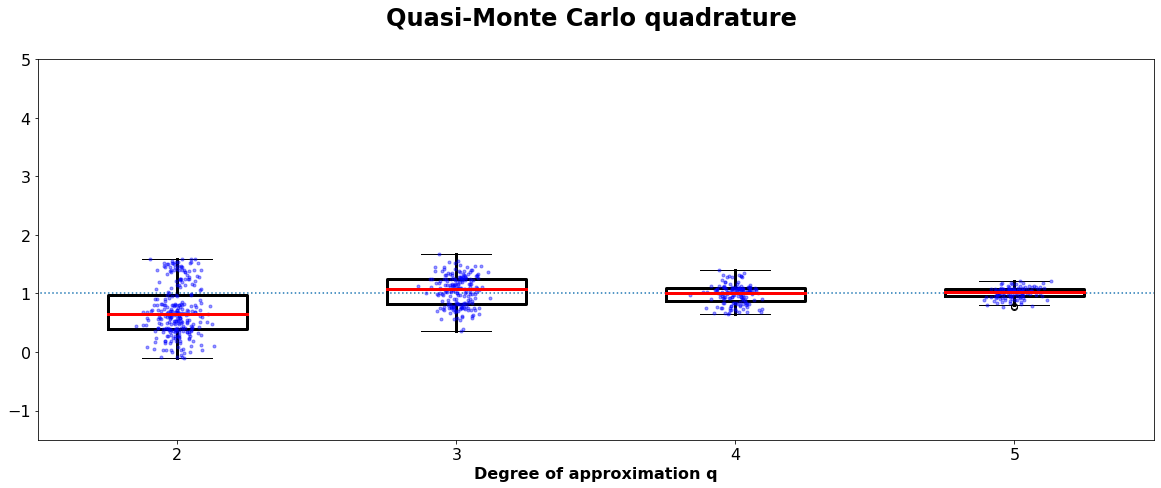

In [3]:
title_string = ["One point for q = 1 on the one dimensional level \n\n Monte Carlo quadrature (nested)\n", "Monte Carlo quadrature (non-nested)\n", 
                "Quasi-Monte Carlo quadrature \n"]
 
results = results_one
for k_1 in range(len(results[0])):
    fig = plt.figure(figsize=(20,7))
    ax = plt.axes()
    boxprops = dict(linewidth=3.0, color='black')
    whiskerprops = dict(linestyle='-',linewidth=3.0, color='black')
    medianprops = dict(linestyle='-',linewidth=3.0, color='red')
    for k_2 in range(len(results[0][0])-14):
        y =results[0][k_1][k_2]
        bp = plt.boxplot(y, positions = [k_2 + 1], widths = 0.5, boxprops=boxprops,
                        whiskerprops = whiskerprops, medianprops = medianprops)
        x = np.random.normal(k_2+1, 0.05, size=len(y))
        plt.plot(x, y, 'b.', alpha=0.4)
    plt.hlines(1,0,10, linestyles= "dotted") 
    plt.xlim((1.5,  5.5))
    plt.ylim((-1.5,5))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(title_string[k_1], fontsize = 24, fontweight ="bold")
    plt.xlabel("Degree of approximation q", fontsize= 16, fontweight = "bold")
    plt.show()



Boxplot of at least 200 calculations of the function $\pi^2/4 \cdot sin(\pi\cdot x)\cdot sin(\pi\cdot y)$ using probabilistic quadratures . Here q = 2 in implies that we the integral is approximated by a point evaluation. Thus, the high variance for low q is expected. 

By taking a look at the the variance of the result and comparing it to the error estimation, we get a more quantitative impression about the goodness of the approximation

### Three points

For comparison we also show the result, if for q = 1 on the one dimensional level we use 3 points.

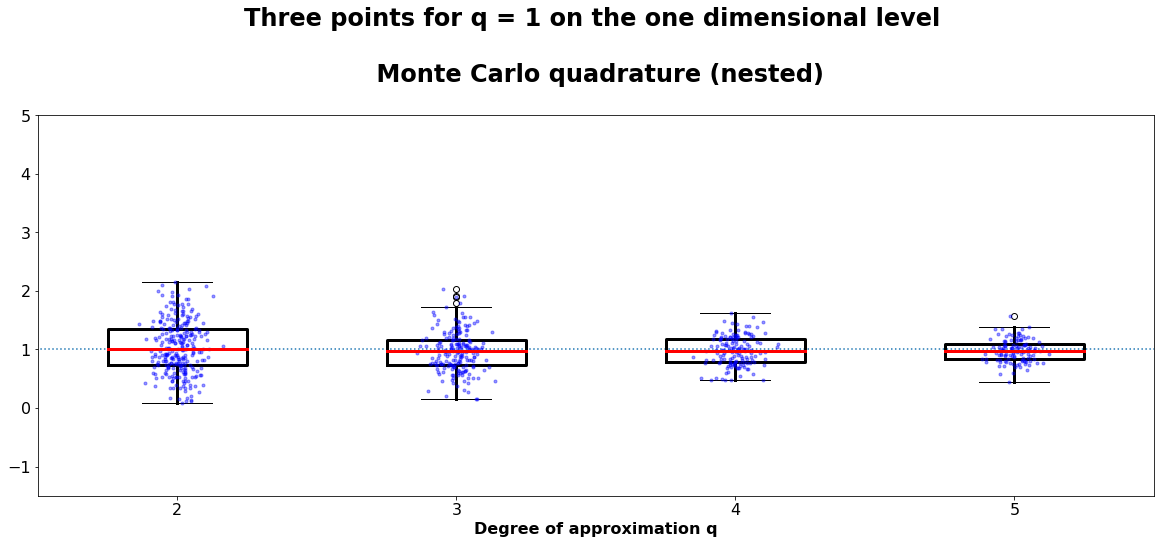

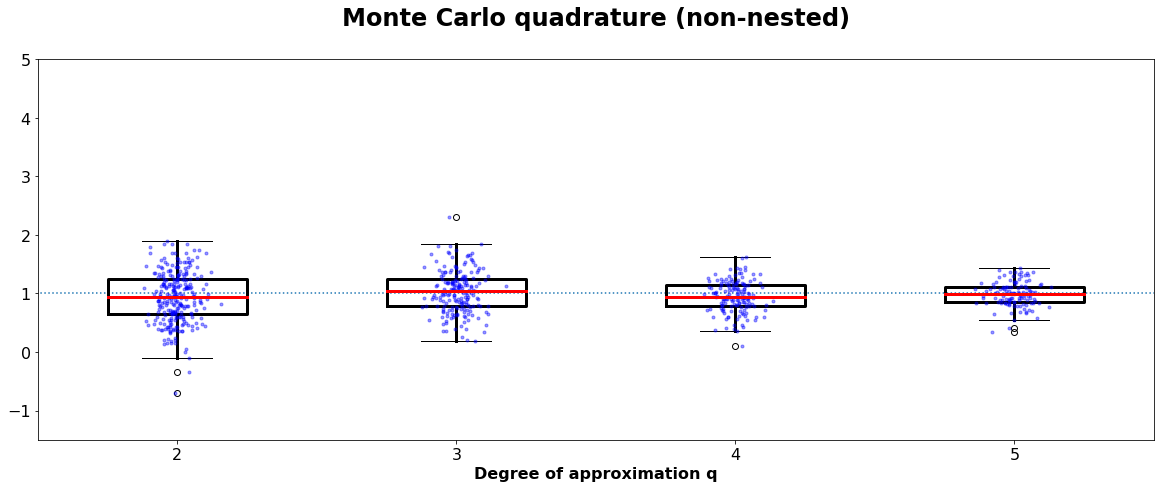

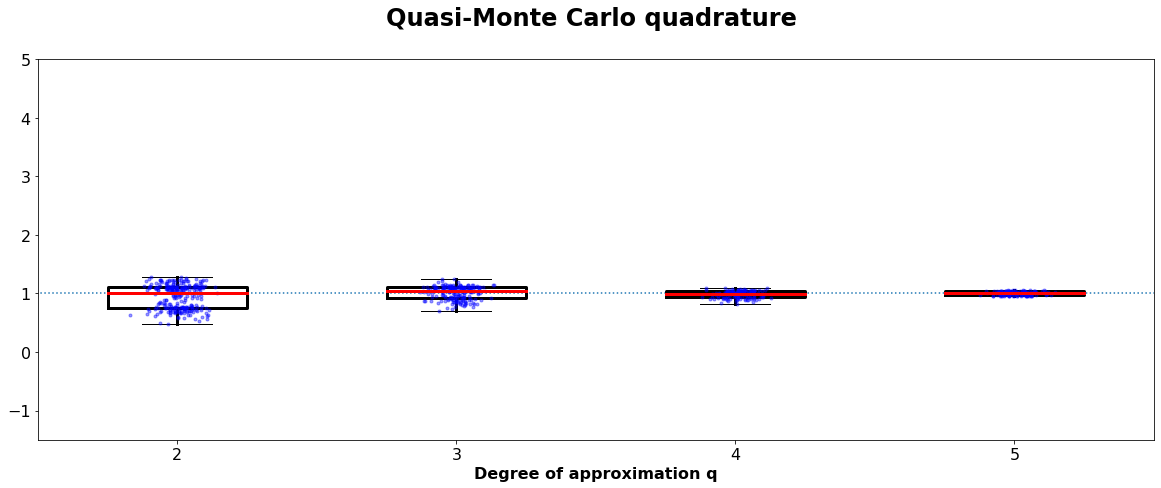

In [4]:
title_string = ["Three points for q = 1 on the one dimensional level \n\n Monte Carlo quadrature (nested)\n", "Monte Carlo quadrature (non-nested)\n", 
                "Quasi-Monte Carlo quadrature \n"]
 
results = results_three
for k_1 in range(len(results[0])):
    fig = plt.figure(figsize=(20,7))
    ax = plt.axes()
    boxprops = dict(linewidth=3.0, color='black')
    whiskerprops = dict(linestyle='-',linewidth=3.0, color='black')
    medianprops = dict(linestyle='-',linewidth=3.0, color='red')
    for k_2 in range(len(results[0][0])-14):
        y =results[0][k_1][k_2]
        bp = plt.boxplot(y, positions = [k_2 + 1], widths = 0.5, boxprops=boxprops,
                        whiskerprops = whiskerprops, medianprops = medianprops)
        x = np.random.normal(k_2+1, 0.05, size=len(y))
        plt.plot(x, y, 'b.', alpha=0.4)
    plt.hlines(1,0,10, linestyles= "dotted") 
    plt.xlim((1.5,  5.5))
    plt.ylim((-1.5,5))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(title_string[k_1], fontsize = 24, fontweight ="bold")
    plt.xlabel("Degree of approximation q", fontsize= 16, fontweight = "bold")
    plt.show()



The approximation in this case is much more exact. A comparison of the runtime and the smaller error will be done later on.

## Statistical parameters of distribution of results 

In [8]:
# Calculation of mean an variance of the result and estimated error of approximation
mean_result = np.ones((2,3,len(results[0][0])))
sigma_result = np.ones((2,3,len(results[0][0])))

mean_error = np.ones((2,3,len(results[0][0])))
sigma_error = np.ones((2,3,len(results[0][0])))

runtime = np.ones((2,3,len(results[0][0])))
runtime_sig = np.ones((2,3,len(results[0][0])))


for k_3 in range(2):
    if k_3 == 0: 
        results = results_one
    else: 
        results = results_three
        
    for k_1 in range(3):
        for k_2 in range(len(results[0][0])):
            mean_result[k_3][k_1][k_2] = np.mean(results[0][k_1][k_2])
            mean_error[k_3][k_1][k_2] = np.mean(results[1][k_1][k_2])

            # We again choose the 95 % level
            sigma_result[k_3][k_1][k_2] = 2 * np.sqrt(np.var(results[0][k_1][k_2]))
            sigma_error[k_3][k_1][k_2] = 2 * np.sqrt(np.var(results[1][k_1][k_2]))

            runtime[k_3][k_1][k_2] = np.mean(results[2][k_1][k_2])
            runtime_sig[k_3][k_1][k_2] = np.sqrt(np.var(results[2][k_1][k_2]))


# What can be found in the different dimensions of the matrices: shape: (2,3,23):
# x: x= 0 q_i uses one point, x=1 q_i uses three points;
# y: y=0 Monte Carlo (nested), y=1 Monte Carlo (non-nested), y=2 Quasi-Monte Carlo (nested)
# z: element related to z = q-2

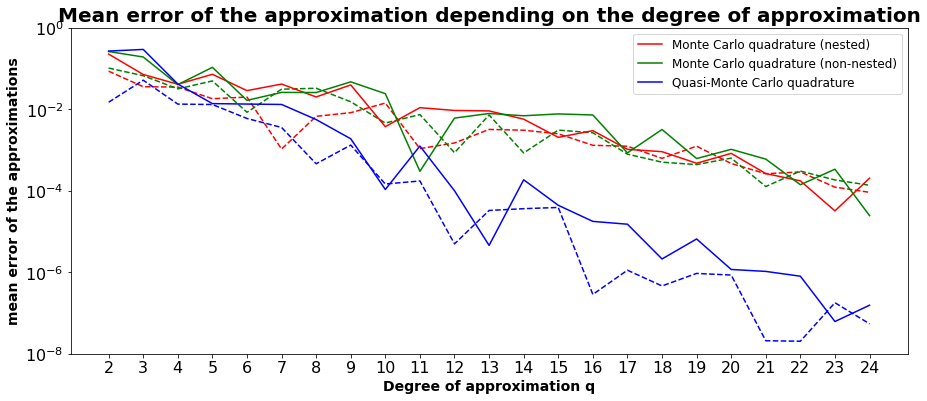

In [11]:
from sklearn import datasets, linear_model
color_code = ["r-", "g-", "b-", "r--", "g--", "b--","r:", "g:", "b:"]
legend_label = ["Monte Carlo quadrature (nested)", "Monte Carlo quadrature (non-nested)", 
                "Quasi-Monte Carlo quadrature"]

fig = plt.figure(figsize=(15,6))

for k_1 in range(6):
    
    # solution not beautiful. Result of afterwards implementing algorithm with one point used for q_i = 1. 
    if k_1 < 3:
        k_2 = 1
        k_1 = k_1 % 3
    else:
        k_2 = 0
        k_1 = k_1 % 3
        
    mean_error_real = abs(mean_result[k_2][k_1]-1)
    mean_sigma_real = sigma_result[k_2][k_1]
#    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    degree_of_app = len(results[0][0])
    if k_2 == 0:
        plt.plot(list(range(2,2+degree_of_app)),mean_error_real,color_code[k_1], label=legend_label[k_1])
    else: 
        plt.plot(list(range(2,2+degree_of_app)),mean_error_real,color_code[k_1+3*k_2])
        
plt.ylim(min(abs(mean_result[1][2]-1)*0.5),max(abs(mean_result[0][0]-1)*1.5))
plt.yscale("log")
plt.ylim([1e-8,1])
plt.legend(fontsize=12, loc=1)
plt.xlabel("Degree of approximation q", fontsize = 14,fontweight = "bold")
plt.ylabel("mean error of the approximations",fontsize = 14,fontweight = "bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(range(2,len(results[0][0])+2))
plt.title("Mean error of the approximation depending on the degree of approximation",
          fontsize = 20, fontweight = "bold")     
plt.show()


This graphic shows the mean of the real error of the different approximations. The solid lines are related to the approximations using one point for q_i = 1, while the dotted lines were calculated for q_i = 3. The points for q near 24 are statistically speaking less significant because about 25 approximations were calculated. 

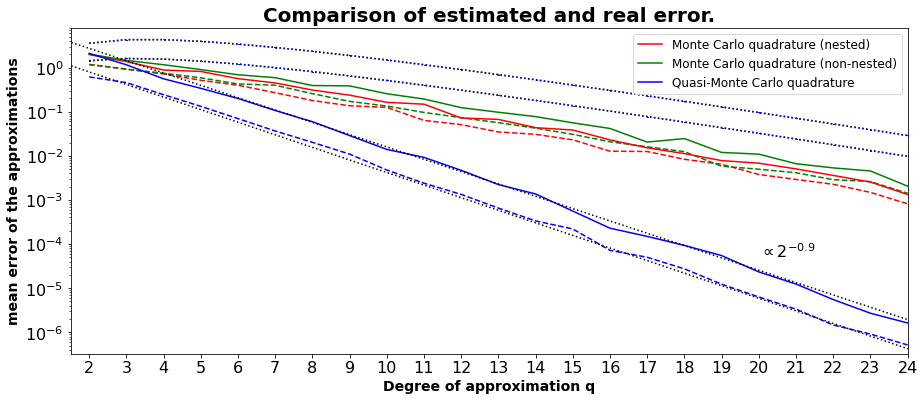

In [12]:
fig = plt.figure(figsize=(15,6))
for k_1 in range(6):
    
    # solution not beautiful. Result of afterwards implementing algorithm with one point used for q_i = 1. 
    if k_1 < 3:
        k_2 = 1
        k_1 = k_1 % 3
    else:
        k_2 = 0
        k_1 = k_1 % 3
for k_1 in range(6):
        # solution not beautiful. Result of afterwards implementing algorithm with one point used for q_i = 1. 
    if k_1 < 3:
        k_2 = 1
        k_1 = k_1 % 3
    else:
        k_2 = 0
        k_1 = k_1 % 3

    mean_error_est  = mean_error[k_2][k_1]
    
    s_mean = sigma_result[k_2][k_1]
    s_error  = sigma_error[k_2][k_1]
    mean_error_real = abs(mean_result[k_2][k_1]-1)
    mean_sigma_real = sigma_result[k_2][k_1]


    degree_of_app = len(results[0][0])
    
    plt.errorbar(list(range(2,2+degree_of_app)), mean_error_est, s_error,ecolor=color_code[k_1][0], 
                 color=(0,0,0,0),marker="_",capsize=0.5)
    plt.plot(list(range(2,2+degree_of_app)),mean_error_est, color_code[k_1+6])
    if k_2 == 0:
        plt.plot(list(range(2,2+degree_of_app)),np.add(mean_error_real,s_mean),color_code[k_1+ k_2 * 3],label=legend_label[k_1])
    else: 
        plt.plot(list(range(2,2+degree_of_app)),np.add(mean_error_real,s_mean),color_code[k_1+ k_2 *3])
    
    if k_1 == 2:
        regression_data_x = [[k_1] for k_1 in list(range(2,2+degree_of_app))]
        regression_data_y = [math.log2(k_1) for k_1 in np.add(mean_error_real,s_mean)]
        regr = linear_model.LinearRegression()
        regr.fit(regression_data_x , regression_data_y)
        regr.score(regression_data_x , regression_data_y)
        exponent = regr.coef_
        
        regression_data_x = [[k_1] for k_1 in list(range(2,2+degree_of_app))]
        regression_data_y = [math.log2(k_1) for k_1 in np.add(mean_error_real,s_mean)]
        regr = linear_model.LinearRegression()
        regr.fit(regression_data_x , regression_data_y)
        regr.score(regression_data_x , regression_data_y)
        exponent = regr.coef_
    
        regression_y = [np.add(mean_error_real,s_mean)[0]*1.3*2**(exponent[0]*(x -2))  for x in list(range(0,20+degree_of_app))]
        plt.plot(list(range(0,20+degree_of_app)),regression_y, "k:")
        if k_2 == 1:
            plt.annotate("$\propto 2^{-0.9}$", (20,regression_y[19]),xytext=(20,5*10**(-5)), fontweight="bold",fontsize=16)

plt.ylim(min(abs(np.add(mean_error_real,s_mean))*0.2),max(abs(mean_error[1][2])*5))
plt.xlim(1.5,degree_of_app+0.5)
plt.yscale("log")
plt.legend(fontsize=12, loc=1)
plt.xlabel("Degree of approximation q", fontsize = 14,fontweight = "bold")
plt.ylabel("mean error of the approximations",fontsize = 14,fontweight = "bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(range(2,len(results[0][0])+2))
plt.title("Comparison of estimated and real error.",
          fontsize = 20, fontweight = "bold")     

plt.show()

The dotted lines are the error estimations for the different quadratures.  The upper one is related to the calculations  using one point for q_i  = 1. The lower lines show the error within a confidence level of 95 %.". The real error bound nearly decreases proportional to 2 ** (-1), if the Quasi-Monte Carlo quadrature is used. The exponent is varying a little with respect to the generated data used.

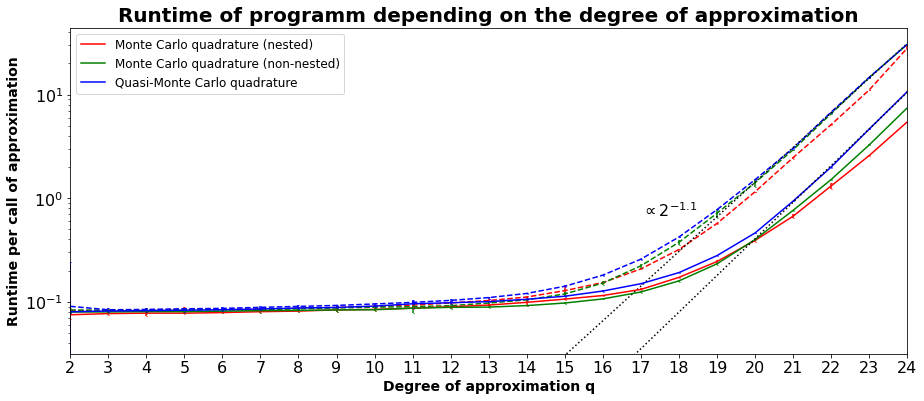

In [16]:
fig = plt.figure(figsize=(15,6))

for k_1 in range(6):
    
    # solution not beautiful. Result of afterwards implementing algorithm with one point used for q_i = 1. 
    if k_1 < 3:
        k_2 = 1
        k_1 = k_1 % 3
    else:
        k_2 = 0
        k_1 = k_1 % 3
for k_1 in range(6):
        # solution not beautiful. Result of afterwards implementing algorithm with one point used for q_i = 1. 
    if k_1 < 3:
        k_2 = 1
        k_1 = k_1 % 3
    else:
        k_2 = 0
        k_1 = k_1 % 3
    runtime_mean = runtime[k_2][k_1]
    runtime_sigma = runtime_sig[k_2][k_1]

    degree_of_app = len(runtime_mean)
    
    if k_2 == 0:
        plt.plot(list(range(2,2+degree_of_app)),runtime_mean,color_code[k_1], label=legend_label[k_1])
    else: 
        plt.plot(list(range(2,2+degree_of_app)),runtime_mean,color_code[k_1 + 3])
    plt.errorbar(list(range(2,2+degree_of_app)), runtime_mean, runtime_sigma,ecolor=color_code[k_1][0], 
                 color=(0,0,0,0),marker="_",capsize=0.5)
    if k_1 == 2:

        
        regression_data_x = [[k_1] for k_1 in list(range(2,2+degree_of_app))]
        regression_data_y = [math.log2(k_1) for k_1 in runtime_mean]
        regr = linear_model.LinearRegression()
        regr.fit(regression_data_x , regression_data_y)
        regr.score(regression_data_x , regression_data_y)
        exponent = regr.coef_

        
        regression_data_x = [[k_1] for k_1 in list(range(21,2+degree_of_app))]
        regression_data_y = [math.log2(k_1) for k_1 in runtime_mean[19:degree_of_app]]
        regr = linear_model.LinearRegression()
        regr.fit(regression_data_x , regression_data_y)
        regr.score(regression_data_x , regression_data_y)
        exponent = regr.coef_
        regression_y = [2** (regr.intercept_ + exponent*x) for x in list(range(0,20+degree_of_app))]
        plt.plot(list(range(0,20+degree_of_app)),regression_y, "k:")
    
        if k_2 == 1:
            plt.annotate("$\propto 2^{-1.1}$", (20,regression_y[19]),xytext=(17,regression_y[19]), fontweight="bold",fontsize=16)
    
plt.xlim(2,24)
plt.ylim(min(abs(runtime[0][2]-1)*0.5),max(abs(runtime[1][2]-1)*1.5))
plt.yscale("log")
plt.legend(fontsize=12, loc=2)
plt.xlabel("Degree of approximation q", fontsize = 14,fontweight = "bold")
plt.ylabel("Runtime per call of approximation",fontsize = 14,fontweight = "bold")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(range(2,len(results[0][0])+2))
plt.title("Runtime of programm depending on the degree of approximation",
          fontsize = 20, fontweight = "bold")     
plt.show()



It could be seen that the difference between the three quadratures is minor for this example. The variance of the runtime is relatively low. The observed runtime did not change fundamentally for changes in the implementation, such that this might be a related to the algorithm itself. 

### Code used for generation of evaluated data.

In [15]:
'''
import os
#os.chdir("..")
import Methodes.Smolyak_one as Smolyak_one

Smolyak_one.calculate_stat_data("pi^2/4 sin(pi*x)sin(pi*y)", "(x,y)", ["Monte Carlo (nested)","Monte Carlo (non-nested)","Quasi-Monte Carlo"]
   , "stat_approach_2_to_20_result_6_1_one.csv", 
                                      [2, 25], repetitions=2 ** 10, damping=True, damping_exp=1.2)
import Methodes.Smolyak_three as Smolyak_three

Smolyak_three.calculate_stat_data("pi^2/4 sin(pi*x)sin(pi*y)", "(x,y)", ["Monte Carlo (nested)", "Monte Carlo (non-nested)","Quasi-Monte Carlo"]
    , "stat_approach_2_to_20_result_6_1_three.csv", [2, 25], repetitions=2 ** 10, damping=True,
                        damping_exp=1.2)
'''
print("Approximation of analytical function in 2 dimensions. (Three points)")

Approximation of analytical function in 2 dimensions. (Three points)
